#**What are Feature Descriptors?**

Feature descriptors are like labels that describe important points in an image, helping us compare and match those points between different images.

# **SIFT (Scale-Invariant Feature Transform)**

In [10]:
import numpy as np
import cv2 as cv

img = cv.imread('charminar.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp = sift.detect(gray,None)

img=cv.drawKeypoints(gray,kp,img)

cv.imwrite('sift_keypoints.jpg',img)


True

In [11]:
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg',img)

True

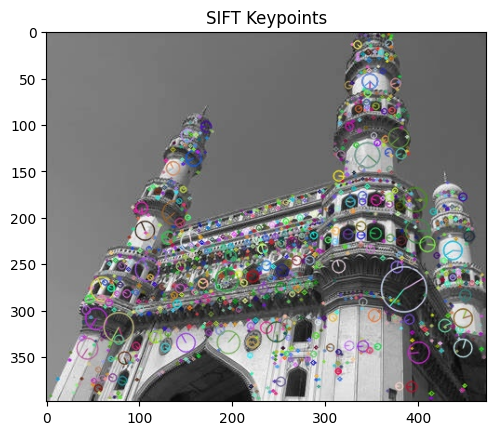

In [12]:
img = cv.imread('sift_keypoints.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('SIFT Keypoints')
plt.show()

> The circles in SIFT represent the detected keypoints in an image. Each circle's center marks the location of a keypoint, while its size indicates the scale (the region's size in the image) at which the keypoint was detected. Additionally, the orientation of the keypoint (used for rotation invariance) is often depicted by an arrow within or around the circle. These circles visually demonstrate the scale, location, and orientation of features identified by the SIFT algorithm.




# **SURF (Speeded-Up Robust Features)**
SURF is more like a blob detector. It detects the white blobs on wings of butterfly. U-SURF can be used to not find the orientation and keep everything Upright.

SURF is patented and it doesnt seem to be available for free. I tried looking it up at the opencv-contrib-python
since its not available in openve-python. But again, it failed and it seemed like i had to hardcode the function so I ignored it :)

The opencv documentation has a decent explaination of SURF ([Click here for it](https://docs.opencv.org/4.x/df/dd2/tutorial_py_surf_intro.html))




In [4]:
import cv2 as cv
img = cv.imread('fly.png', cv.IMREAD_GRAYSCALE)

In [23]:
!pip install opencv-contrib-python==4.5.5.64
 #since opencv-python does not have SURF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.11.0.86
    Uninstalling opencv-contrib-python-4.11.0.86:
      Successfully uninstalled opencv-contrib-python-4.11.0.86


In [2]:
import cv2
print(cv2.__version__)  # Make sure this matches the version you installed
print(dir(cv2))         # Check if 'xfeatures2d' is listed
if 'xfeatures2d' in dir(cv2):
    print("xfeatures2d module is available.")
else:
    print("xfeatures2d module is not available.")

4.5.5
['', 'ACCESS_FAST', 'ACCESS_MASK', 'ACCESS_READ', 'ACCESS_RW', 'ACCESS_WRITE', 'ADAPTIVE_THRESH_GAUSSIAN_C', 'ADAPTIVE_THRESH_MEAN_C', 'AGAST_FEATURE_DETECTOR_AGAST_5_8', 'AGAST_FEATURE_DETECTOR_AGAST_7_12D', 'AGAST_FEATURE_DETECTOR_AGAST_7_12S', 'AGAST_FEATURE_DETECTOR_NONMAX_SUPPRESSION', 'AGAST_FEATURE_DETECTOR_OAST_9_16', 'AGAST_FEATURE_DETECTOR_THRESHOLD', 'AKAZE', 'AKAZE_DESCRIPTOR_KAZE', 'AKAZE_DESCRIPTOR_KAZE_UPRIGHT', 'AKAZE_DESCRIPTOR_MLDB', 'AKAZE_DESCRIPTOR_MLDB_UPRIGHT', 'AKAZE_create', 'AffineFeature', 'AffineFeature_create', 'AffineTransformer', 'AgastFeatureDetector', 'AgastFeatureDetector_AGAST_5_8', 'AgastFeatureDetector_AGAST_7_12d', 'AgastFeatureDetector_AGAST_7_12s', 'AgastFeatureDetector_NONMAX_SUPPRESSION', 'AgastFeatureDetector_OAST_9_16', 'AgastFeatureDetector_THRESHOLD', 'AgastFeatureDetector_create', 'Algorithm', 'AlignExposures', 'AlignMTB', 'AsyncArray', 'BFMatcher', 'BFMatcher_create', 'BORDER_CONSTANT', 'BORDER_DEFAULT', 'BORDER_ISOLATED', 'BORDER_R

In [5]:
# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv.xfeatures2d.SURF_create()

error: OpenCV(4.5.5) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1027: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [ ]:
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)

In [ ]:
len(kp)


### **FAST Algorithm for Corner Detection**

All the above feature detection methods are good in some way. But they are not fast enough to work in real-time applications. There comes the FAST algorithm, which is really "FAST".

### **BRIEF (Binary Robust Independent Elementary Features)**

SIFT uses a feature descriptor with 128 floating point numbers. Consider thousands of such features. It takes lots of memory and more time for matching. We can compress it to make it faster. But still we have to calculate it first. There comes BRIEF which gives the shortcut to find binary descriptors with less memory, faster matching, still higher recognition rate.

### **ORB (Oriented FAST and Rotated BRIEF)**

SIFT and SURF are good in what they do, but what if you have to pay a few dollars every year to use them in your applications? Yeah, they are patented!!! To solve that problem, OpenCV devs came up with a new "FREE" alternative to SIFT & SURF, and that is ORB.

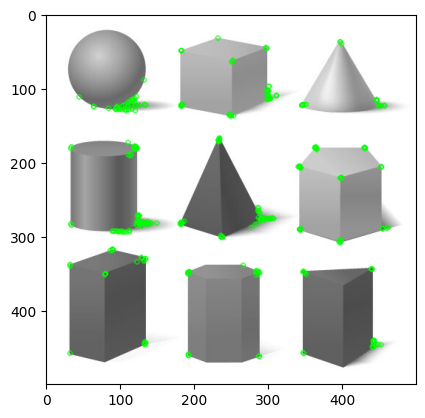

(<matplotlib.image.AxesImage at 0x789752624e90>, None)

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('shapes.jpg', cv.IMREAD_GRAYSCALE)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

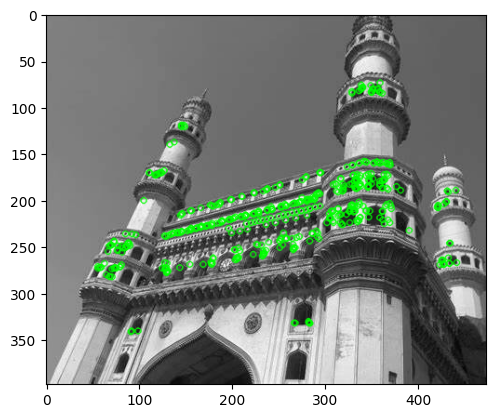

(<matplotlib.image.AxesImage at 0x7f3ac70ac110>, None)

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('charminar.jpg', cv.IMREAD_GRAYSCALE)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

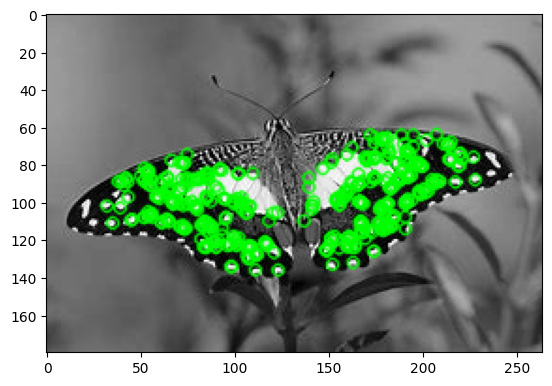

(<matplotlib.image.AxesImage at 0x7f3a96a8c310>, None)

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('fly.jpg', cv.IMREAD_GRAYSCALE)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB
kp, des = orb.compute(img, kp)

# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()